Import Library

In [ ]:
!pip -q install sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 8.1 MB/s eta 0:00:00


In [ ]:
!pip -q install nltk

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pickle

import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 

import random
from joblib import dump

from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Import data

In [ ]:
df = pd.read_excel("GrabID_sucirahayu.xlsx")
df.head()

,From-User,Text Tweet,Sentiment
0,Grab Indonesia,"@iKissTaesan Baik Kak, otw ke DM 🏃‍♀️💨-Mamat",Positif
1,Grab Indonesia,"@__ahsinar Halo Kak, Mohon maaf atas ketidakn...",Positif
2,Grab Indonesia,"@liacliq Hi Kak Aulia, bisa dikirimkan kode pe...",Positif
3,Grab Indonesia,@dhikareani Halo juga Kak 🙏🏼 Maaf bgt yaa Kak ...,Positif
4,VaLia,RT @refalhady: Bike selfie naik @GrabID mumpun...,Positif


In [ ]:
df

,From-User,Text Tweet,Sentiment
0,Grab Indonesia,"@iKissTaesan Baik Kak, otw ke DM 🏃‍♀️💨-Mamat",Positif
1,Grab Indonesia,"@__ahsinar Halo Kak, Mohon maaf atas ketidakn...",Positif
2,Grab Indonesia,"@liacliq Hi Kak Aulia, bisa dikirimkan kode pe...",Positif
3,Grab Indonesia,@dhikareani Halo juga Kak 🙏🏼 Maaf bgt yaa Kak ...,Positif
4,VaLia,RT @refalhady: Bike selfie naik @GrabID mumpun...,Positif
...,...,...,...
782,lalalala~~~,"@jogmfs Coba pakai kereta, lebih murah... liha...",Negatif
783,John Sutadja,"Saya pantau di area mc. D dan sekitarnya, itu ...",Negatif
784,🛴 Jojon Joki Online ❌,RT @kejO_Online: Perut orang rumah ga bisa dit...,Negatif
785,Jasa Ojek Langganan Orang 💉💉💉,Perut orang rumah ga bisa ditunda untuk diisi....,Negatif


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   From-User   786 non-null    object
 1   Text Tweet  787 non-null    object
 2   Sentiment   787 non-null    object
dtypes: object(3)
memory usage: 18.6+ KB


In [ ]:
df.isnull().sum()

From-User     1
Text Tweet    0
Sentiment     0
dtype: int64

In [ ]:
print(df['Text Tweet'].iloc[0],"\n")
print(df['Text Tweet'].iloc[1],"\n")
print(df['Text Tweet'].iloc[2],"\n")
print(df['Text Tweet'].iloc[3],"\n")
print(df['Text Tweet'].iloc[4],"\n")

@iKissTaesan Baik Kak, otw ke DM 🏃‍♀️💨-Mamat 

 @__ahsinar Halo Kak, Mohon maaf atas ketidaknyamanannya yaa Kak 🙇 Supaya bisa kami bantu tindaklanjuti mengenai laporannya, silakan hubungi kami melalui DM dengan ketik #Bantuan atau ketik 'Chat dengan Agent' yaa Kak 🙂 Terima kasih 🙏 -Dedi 

@liacliq Hi Kak Aulia, bisa dikirimkan kode pemesanannya lewat DM dengan ketik #Bantuan. Terima kasih🙏✨-Tita 

@dhikareani Halo juga Kak 🙏🏼 Maaf bgt yaa Kak jadi gak nyaman 🙏🏼 Supaya bisa aku bantu tindaklanjuti, boleh yaa DM aku nomor ponsel dan email yang terdaftar di Grab dgn ketik #Bantuan ⬇ Terima kasih 🙇🏼 -Mamat https://t.co/66G7MWzlg2 

RT @refalhady: Bike selfie naik @GrabID mumpung promonya lagi bocorrr biar makin #KeepKalem kemana-mana ngejar dia. Buruan cek aplikasi gra… 



## **2. Text Preprocessing**

## 1. Case Folding

In [ ]:
def casefolding(text):
  text = text.lower()                               # Mengubah teks menjadi lower case
  text = re.sub(r"https\S+|www\S+https\S+", '',text)# Menghapus URL
  text = re.sub(r'[-+]?[0-9]+', '', text)           # Menghapus angka
  text = re.sub(r'\@w+|\#', '',text)                # Menghapus karakter simbol
  text = re.sub(r'[^\w\s]', '',text)                # Menghapus karakter tanda baca
  text = re.sub(r'_', '',text)                      # Menghapus karakter underscore
  text = re.sub(r'😔\🙏', '',text)                 # Menghapus karakter emoji
  text = re.sub(r'✨\🙇\🏃‍♀️💨', '',text)                 # Menghapus karakter emoji
  text = text.strip()                               # Menghapus whitespaces
  return text

In [ ]:
raw_sample   = df['Text Tweet'].iloc[68]
case_folding = casefolding(raw_sample)

print('Raw data\t: ', raw_sample)
print('Case folding\t: ', case_folding)

Raw data	:  @GrabID Halo min aku mau infoin nih, kalo barang yg tertinggal sudah ada di aku sekarang. Terimakasih gerakan cepatnya min, jadi udh ga khawatir lagi Dan mau pake grab terus. Thanks min ✨👍🏻😊 https://t.co/x2JGdpxq9o
Case folding	:  grabid halo min aku mau infoin nih kalo barang yg tertinggal sudah ada di aku sekarang terimakasih gerakan cepatnya min jadi udh ga khawatir lagi dan mau pake grab terus thanks min


### Word Normalization

In [ ]:
key_norm = pd.read_csv('key_norm.csv')

def text_normalize(text):
  text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text.split()])
  text = str.lower(text)
  return text

### Filtering (Stopword Removal)

In [ ]:
stopwords_ind = stopwords.words('indonesian')

In [ ]:
len(stopwords_ind)

758

In [ ]:
# Lihat daftar stopword yang disediakan NLTK
stopwords_ind

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [ ]:
# Buat fungsi untuk langkah stopword removal

more_stopword = ['donk', 'nya', 'wkwkwk','hhhhh','hahaha','hahah']                    # Tambahkan kata dalam daftar stopword
stopwords_ind = stopwords_ind + more_stopword

def remove_stop_words(text):
  clean_words = []
  text = text.split()
  for word in text:
      if word not in stopwords_ind:
          clean_words.append(word)
  return " ".join(clean_words)

In [ ]:
raw_sample       = df['Text Tweet'].iloc[68]
case_folding     = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)

Raw data		:  @GrabID Halo min aku mau infoin nih, kalo barang yg tertinggal sudah ada di aku sekarang. Terimakasih gerakan cepatnya min, jadi udh ga khawatir lagi Dan mau pake grab terus. Thanks min ✨👍🏻😊 https://t.co/x2JGdpxq9o
Case folding		:  grabid halo min aku mau infoin nih kalo barang yg tertinggal sudah ada di aku sekarang terimakasih gerakan cepatnya min jadi udh ga khawatir lagi dan mau pake grab terus thanks min
Stopword removal	:  grabid halo min infoin nih kalo barang yg tertinggal terimakasih gerakan cepatnya min udh ga khawatir pake grab thanks min


### Stemming

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Buat fungsi untuk langkah stemming bahasa Indonesia
def stemming(text):
  text = stemmer.stem(text)
  return text

In [ ]:
raw_sample       = df['Text Tweet'].iloc[68]
case_folding     = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)
text_stemming    = stemming(stopword_removal)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)
print('Stemming\t\t: ', text_stemming)

Raw data		:  @GrabID Halo min aku mau infoin nih, kalo barang yg tertinggal sudah ada di aku sekarang. Terimakasih gerakan cepatnya min, jadi udh ga khawatir lagi Dan mau pake grab terus. Thanks min ✨👍🏻😊 https://t.co/x2JGdpxq9o
Case folding		:  grabid halo min aku mau infoin nih kalo barang yg tertinggal sudah ada di aku sekarang terimakasih gerakan cepatnya min jadi udh ga khawatir lagi dan mau pake grab terus thanks min
Stopword removal	:  grabid halo min infoin nih kalo barang yg tertinggal terimakasih gerakan cepatnya min udh ga khawatir pake grab thanks min
Stemming		:  grabid halo min infoin nih kalo barang yg tinggal terimakasih gera cepat min udh ga khawatir pake grab thanks min


### Text Preprocessing Pipeline

In [ ]:
# Buat fungsi untuk menggabungkan seluruh langkah text preprocessing
def text_preprocessing_process(text):
  text = casefolding(text)
  text = text_normalize(text)
  text = remove_stop_words(text)
  text = stemming(text)
  return text

In [ ]:
%%time
df['clean_teks'] = df['Text Tweet'].apply(text_preprocessing_process)

# Perhatikan waktu komputasi ketika proses text preprocessing

CPU times: user 1min 56s, sys: 277 ms, total: 1min 57s
Wall time: 1min 59s


In [ ]:
df

,From-User,Text Tweet,Sentiment,clean_teks
0,Grab Indonesia,"@iKissTaesan Baik Kak, otw ke DM 🏃‍♀️💨-Mamat",Positif,ikisstaesan kak jalan dm mamat
1,Grab Indonesia,"@__ahsinar Halo Kak, Mohon maaf atas ketidakn...",Positif,ahsinar halo kak mohon maaf ketidaknyamanannya...
2,Grab Indonesia,"@liacliq Hi Kak Aulia, bisa dikirimkan kode pe...",Positif,liacliq hi kak aulia kirim kode mesan dm ketik...
3,Grab Indonesia,@dhikareani Halo juga Kak 🙏🏼 Maaf bgt yaa Kak ...,Positif,dhikareani halo kak maaf banget yaa kak nyaman...
4,VaLia,RT @refalhady: Bike selfie naik @GrabID mumpun...,Positif,rt refalhady bike selfie grabid mumpung promon...
...,...,...,...,...
782,lalalala~~~,"@jogmfs Coba pakai kereta, lebih murah... liha...",Negatif,jogmfs coba pakai kereta murah lihat aplikasi ...
783,John Sutadja,"Saya pantau di area mc. D dan sekitarnya, itu ...",Negatif,pantau area mc d driver grab gerombol buat cur...
784,🛴 Jojon Joki Online ❌,RT @kejO_Online: Perut orang rumah ga bisa dit...,Negatif,rt kejoonline perut orang rumah tunda isi apli...
785,Jasa Ojek Langganan Orang 💉💉💉,Perut orang rumah ga bisa ditunda untuk diisi....,Negatif,perut orang rumah tunda isi aplikasi gojek gra...


In [ ]:
# Simpan data yang telah melalui text preprocessing agar kita tidak perlu menjalankan proses tersebut mulai awal (Opsional)
df.to_csv('clean_data_fix.csv')

## Feature Engineering

In [ ]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
df['Sentiment'] = lb.fit_transform (df['Sentiment'])
df

,From-User,Text Tweet,Sentiment,clean_teks
0,Grab Indonesia,"@iKissTaesan Baik Kak, otw ke DM 🏃‍♀️💨-Mamat",2,ikisstaesan kak jalan dm mamat
1,Grab Indonesia,"@__ahsinar Halo Kak, Mohon maaf atas ketidakn...",2,ahsinar halo kak mohon maaf ketidaknyamanannya...
2,Grab Indonesia,"@liacliq Hi Kak Aulia, bisa dikirimkan kode pe...",2,liacliq hi kak aulia kirim kode mesan dm ketik...
3,Grab Indonesia,@dhikareani Halo juga Kak 🙏🏼 Maaf bgt yaa Kak ...,2,dhikareani halo kak maaf banget yaa kak nyaman...
4,VaLia,RT @refalhady: Bike selfie naik @GrabID mumpun...,2,rt refalhady bike selfie grabid mumpung promon...
...,...,...,...,...
782,lalalala~~~,"@jogmfs Coba pakai kereta, lebih murah... liha...",1,jogmfs coba pakai kereta murah lihat aplikasi ...
783,John Sutadja,"Saya pantau di area mc. D dan sekitarnya, itu ...",1,pantau area mc d driver grab gerombol buat cur...
784,🛴 Jojon Joki Online ❌,RT @kejO_Online: Perut orang rumah ga bisa dit...,1,rt kejoonline perut orang rumah tunda isi apli...
785,Jasa Ojek Langganan Orang 💉💉💉,Perut orang rumah ga bisa ditunda untuk diisi....,1,perut orang rumah tunda isi aplikasi gojek gra...


In [ ]:
print('Total Jumlah Teks:', df.shape[0], 'data\n')
print('terdiri dari (Sentiment):')
print('-- [2] Positif\t:', df[df.Sentiment == 2].shape[0], 'data')
print('-- [1] Negatif\t:', df[df.Sentiment == 1].shape[0], 'data')

Total Jumlah Teks: 787 data

terdiri dari (Sentiment):
-- [2] Positif	: 528 data
-- [1] Negatif	: 258 data


In [ ]:
# Pisahkan kolom feature dan target
X = df['clean_teks']
y = df['Sentiment']

In [ ]:
X

0                         ikisstaesan kak jalan dm mamat
1      ahsinar halo kak mohon maaf ketidaknyamanannya...
2      liacliq hi kak aulia kirim kode mesan dm ketik...
3      dhikareani halo kak maaf banget yaa kak nyaman...
4      rt refalhady bike selfie grabid mumpung promon...
                             ...                        
782    jogmfs coba pakai kereta murah lihat aplikasi ...
783    pantau area mc d driver grab gerombol buat cur...
784    rt kejoonline perut orang rumah tunda isi apli...
785    perut orang rumah tunda isi aplikasi gojek gra...
786    kompascom mahal grab gocar masuk akal aplikasi...
Name: clean_teks, Length: 787, dtype: object

In [ ]:
y

0      2
1      2
2      2
3      2
4      2
      ..
782    1
783    1
784    1
785    1
786    1
Name: Sentiment, Length: 787, dtype: int64

### Feature Extraction (TF-IDF & N-Gram)
Proses mengubah teks menjadi vector menggunakan metode TF-IDF

In [ ]:
tf_idf = TfidfVectorizer(ngram_range=(1,1))
tf_idf.fit(X)

TfidfVectorizer()

In [ ]:
# Melihat Jumlah Fitur
print(len(tf_idf.get_feature_names_out()))

2383


In [ ]:
# Melihat matriks jumlah token
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

X_tf_idf = tf_idf.transform(X).toarray()
X_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Melihat matriks jumlah token menggunakan TF IDF, lihat perbedaannya dengan metode BoW
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

data_tf_idf = pd.DataFrame(X_tf_idf, columns=tf_idf.get_feature_names_out())
data_tf_idf

,aaaa,abadi,abang,acara,achimenmoo,ackerenlev,adain,adasaya,adat,add,...,zepeto,zerobaseone,zona,zonaba,zonabu,zonajajan,zonauang,zonevenomwar,zonk,zzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
with open('tf_idf_feature.pickle', 'wb') as output:
  pickle.dump(X_tf_idf, output)

### Feature Selection

In [ ]:
# Mengubah nilai data tabular tf-idf menjadi array agar dapat dijalankan pada proses seleksi fitur
X = np.array(data_tf_idf)
y = np.array(y)

In [ ]:
# Ten features with highest chi-squared statistics are selected 
chi2_features    = SelectKBest(chi2, k=500) 
X_kbest_features = chi2_features.fit_transform(X, y) 
  
# Reduced features 
print('Original feature number:', X.shape[1]) 
print('Reduced feature number:', X_kbest_features.shape[1]) 

Original feature number: 2383
Reduced feature number: 500


In [ ]:
# chi2_features.scores_ adalah nilai chi-square, semakin tinggi nilainya maka semakin baik fiturnya
data_chi2 = pd.DataFrame(chi2_features.scores_, columns=['nilai'])
data_chi2

,nilai
0,0.324981
1,0.141356
2,0.214042
3,0.296000
4,0.199084
...,...
2378,0.014969
2379,0.698551
2380,1.541872
2381,1.261519


In [ ]:
# Menampilkan fitur beserta nilainya
feature = tf_idf.get_feature_names_out()
data_chi2['fitur'] = feature
data_chi2

,nilai,fitur
0,0.324981,aaaa
1,0.141356,abadi
2,0.214042,abang
3,0.296000,acara
4,0.199084,achimenmoo
...,...,...
2378,0.014969,zonajajan
2379,0.698551,zonauang
2380,1.541872,zonevenomwar
2381,1.261519,zonk


In [ ]:
# Mengurutkan fitur terbaik
data_chi2.sort_values(by='nilai', ascending=False)

,nilai,fitur
310,265.907790,brou
680,265.907790,gentaaar
2347,265.907790,yaelah
615,83.501334,favorit
1307,50.827194,merchant
...,...,...
191,0.001264,bakso
521,0.001203,disko
321,0.001203,buerbatos
1369,0.001040,mudah


In [ ]:
# Menampilkan mask pada feature yang diseleksi
# False berarti fitur tidak terpilih dan True berarti fitur terpilih
mask = chi2_features.get_support()
mask

array([False, False, False, ...,  True,  True,  True])

In [ ]:
# Menampilkan fitur-fitur terpilih berdasarkan mask atau nilai tertinggi yang sudah dikalkulasi pada Chi-Square
new_feature = []

for bool, f in zip(mask, feature):
  if bool:
    new_feature.append(f)
  selected_feature = new_feature

selected_feature

['admin',
 'agen',
 'air',
 'ajaalur',
 'aju',
 'akibat',
 'alamat',
 'alangshukrimun',
 'aldapstsr',
 'alfa',
 'algoritma',
 'aman',
 'amanaman',
 'ambil',
 'angkat',
 'anjjjjjjjjj',
 'anjrittt',
 'ap',
 'apk',
 'aplika',
 'aplikasi',
 'app',
 'argo',
 'asik',
 'asli',
 'astaga',
 'ato',
 'atur',
 'awkwkkwkookwkokk',
 'ayam',
 'ayang',
 'bablas',
 'bacot',
 'bahan',
 'bahas',
 'bahaya',
 'bakar',
 'balas',
 'balesnya',
 'balikkk',
 'bandara',
 'bangke',
 'bangkrut',
 'bantu',
 'banyak',
 'barang',
 'bareng',
 'barter',
 'batal',
 'bawa',
 'bayar',
 'bb',
 'bebas',
 'beda',
 'belah',
 'belanja',
 'beliau',
 'benah',
 'bener',
 'bensin',
 'berita',
 'biar',
 'bilang',
 'bittercaffeines',
 'blibli',
 'bomb',
 'brarti',
 'brou',
 'bubur',
 'budi',
 'budionosentoso',
 'bumbu',
 'buset',
 'calonparumaen',
 'cancel',
 'car',
 'carla',
 'cash',
 'ce',
 'cek',
 'cewek',
 'chat',
 'checkout',
 'chizikook',
 'chuaaaksss',
 'close',
 'cm',
 'contoh',
 'cowok',
 'cs',
 'cuai',
 'cusss',
 'customer

In [ ]:
# Memilih fitur yang telah terseleksi dari vocabulary TF IDF
kbest_feature = {}

for (k,v) in tf_idf.vocabulary_.items():
  if k in selected_feature:
    kbest_feature[k] = v

In [ ]:
len(kbest_feature)

500

In [ ]:
# Menampilkan fitur-fitur yang sudah diseleksi 
# Beserta nilai vektornya pada keseluruhan data untuk dijalankan pada proses machine learning

# Hanya k fitur yang terpilih sesuai parameter k yang ditentukan sebelumnya

data_selected_feature = pd.DataFrame(X_kbest_features, columns=selected_feature)
data_selected_feature

,admin,agen,air,ajaalur,aju,akibat,alamat,alangshukrimun,aldapstsr,alfa,...,yamawar,yatita,yoiyolah,yuk,zafrants,zeannadhiva,zona,zonevenomwar,zonk,zzzz
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.207158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
783,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
784,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
785,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
with open('kbest_feature.pickle', 'wb') as output:
  pickle.dump(kbest_feature, output)

## Modelling (Machine Learning)  SVM



1. Support Vector Machine (SVM)

In [ ]:
# Memisihkan data training dan data testing dengan perbandingan 80:20
X_train, X_test, y_train, y_test = train_test_split(X_kbest_features, y, test_size=0.2, random_state=40)

In [ ]:
from sklearn.svm import LinearSVC

# Membuat objek SVM dengan kernel linier
algorithm = LinearSVC()

# Melatih model dengan data pelatihan
model = algorithm.fit(X_train, y_train)

## Prediction

In [ ]:
# Prediksi untuk Data Latih
predicted_train = model.predict(X_train)

# hasil ini akan kita bandingkan dengan nilai y_train (labeling dari manusia)
predicted_train[1:20]

array([1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1])

In [ ]:
# Prediksi untuk Data Uji
predicted_test = model.predict(X_test)

# hasil ini akan kita bandingkan dengan nilai y_test (labeling dari manusia)
predicted_test[1:20]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2])

# Model Evaluation

In [ ]:
# Perhitungan Performa Model untuk Data Latih
CM = confusion_matrix(y_train, predicted_train)

print(CM,'\n')

print("ACCURACY\t:", accuracy_score(y_train, predicted_train)*100,"%\n")

print(classification_report(y_train,predicted_train))

[[201  17]
 [  8 403]] 

ACCURACY	: 96.02543720190779 %

              precision    recall  f1-score   support

           1       0.96      0.92      0.94       218
           2       0.96      0.98      0.97       411

    accuracy                           0.96       629
   macro avg       0.96      0.95      0.96       629
weighted avg       0.96      0.96      0.96       629



In [ ]:
# Perhitungan Performa Model untuk Data Uji
CM = confusion_matrix(y_test, predicted_test)

print(CM,'\n')

print("ACCURACY\t:", accuracy_score(y_test, predicted_test)*100,"%\n")

print(classification_report(y_test,predicted_test))

[[  0   0   1]
 [  0  22  18]
 [  0   6 111]] 

ACCURACY	: 84.17721518987342 %

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.79      0.55      0.65        40
           2       0.85      0.95      0.90       117

    accuracy                           0.84       158
   macro avg       0.55      0.50      0.52       158
weighted avg       0.83      0.84      0.83       158



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Modelling (Machine Learning) NBC

In [ ]:
from sklearn.naive_bayes import MultinomialNB             # Pilih salah satu algoritma supervised learning. Contoh ini menggunakan algoritma Naive Bayes
from sklearn.model_selection import train_test_split

In [ ]:
# Memisihkan data training dan data testing dengan perbandingan 80:20
X_train, X_test, y_train, y_test = train_test_split(X_kbest_features, y, test_size=0.2, random_state=0)

In [ ]:
# Training the model
algorithm = MultinomialNB()               # Load algoritma pembelajaran
model = algorithm.fit(X_train, y_train)   # Fitkan (latih) algoritma pada data latih & label latih 


In [ ]:
# Gunakan model yang telah di latih untuk memprediksi label pada data uji
model_pred = model.predict(X_train)

# Tampilkan hasil prediksi label dari model
model_pred

array([2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,

In [ ]:
# Gunakan model yang telah di latih untuk memprediksi label pada data uji
model_pred = model.predict(X_test)

# Tampilkan hasil prediksi label dari model
model_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2])

## **Model Evaluation NBC** 

In [ ]:
# Perhitungan Performa Model untuk Data Latih
CM = confusion_matrix(y_train, predicted_train)

print(CM,'\n')

print("ACCURACY\t:", accuracy_score(y_train, predicted_train)*100,"%\n")

print(classification_report(y_train,predicted_train))

[[ 66 142]
 [143 278]] 

ACCURACY	: 54.68998410174881 %

              precision    recall  f1-score   support

           1       0.32      0.32      0.32       208
           2       0.66      0.66      0.66       421

    accuracy                           0.55       629
   macro avg       0.49      0.49      0.49       629
weighted avg       0.55      0.55      0.55       629



In [ ]:
# Perhitungan Performa Model untuk Data Uji
CM = confusion_matrix(y_test, predicted_test)

print(CM,'\n')

print("ACCURACY\t:", accuracy_score(y_test, predicted_test)*100,"%\n")

print(classification_report(y_test,predicted_test))

[[ 0  0  1]
 [ 0 14 36]
 [ 0 14 93]] 

ACCURACY	: 67.72151898734177 %

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      0.28      0.36        50
           2       0.72      0.87      0.78       107

    accuracy                           0.68       158
   macro avg       0.41      0.38      0.38       158
weighted avg       0.64      0.68      0.65       158



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Grafik Polaritas Sentimen

Keterangan Label:

*   1 = Negatif
*   2 = Positif



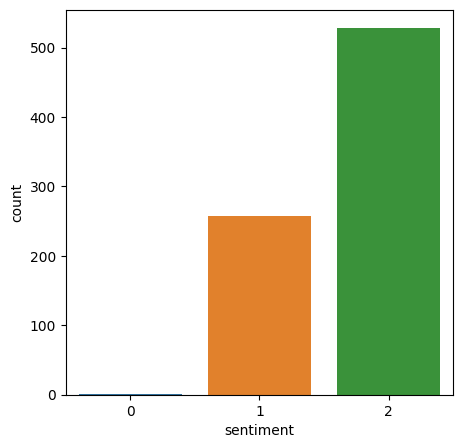

In [ ]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.countplot(x='Sentiment', data = df)
plt.xlabel("sentiment")
plt.ylabel("count")
plt.show()

### WordCloud

In [ ]:
# Import Library WordCloud. WordCloud digunakan untuk melihat secara visual kata-kata yang paling sering muncul.
# Import Library cv2 untuk mengolah gambar menjadi masking WordCloud

import cv2
from wordcloud import WordCloud

In [ ]:
# Download gambar masking
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg

--2023-06-04 06:32:44--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34396 (34K) [image/jpeg]
Saving to: ‘cloud.jpg’

cloud.jpg           100%[===================>]  33.59K  --.-KB/s    in 0.002s  

2023-06-04 06:32:45 (14.3 MB/s) - ‘cloud.jpg’ saved [34396/34396]



In [ ]:
originalImage = cv2.imread('cloud.jpg')
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
(thresh, cloud_mask) = cv2.threshold(grayImage, 100, 255, cv2.THRESH_BINARY)

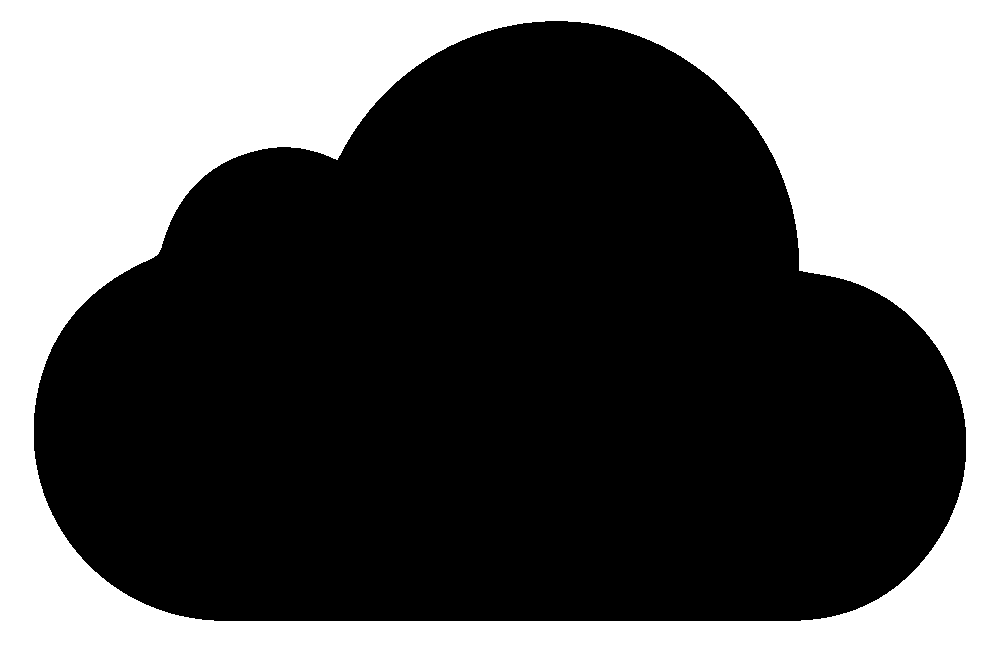

In [ ]:
# Tampilkan masking
from google.colab.patches import cv2_imshow

cv2_imshow(cloud_mask)

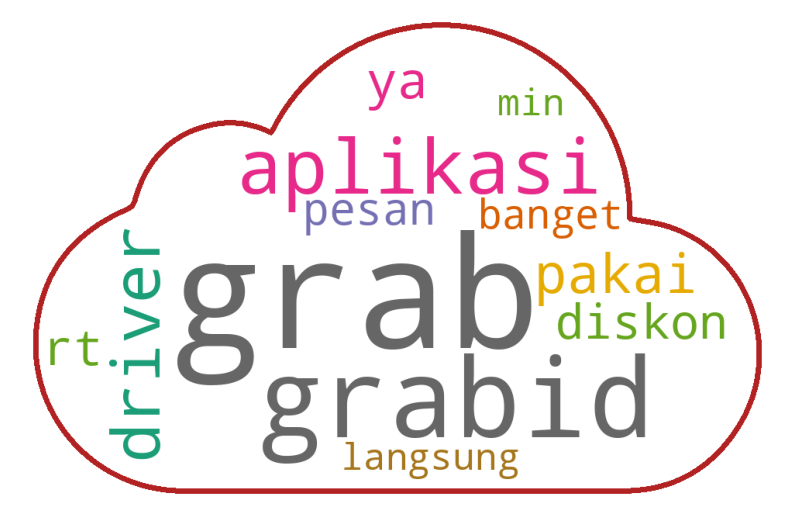

In [ ]:
# WordCloud Label 1.0 (positive)

positive = df[df.Sentiment == 1.0]
positive_string = []

for t in positive.clean_teks:
  positive_string.append(t)

positive_string = pd.Series(positive_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(positive_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

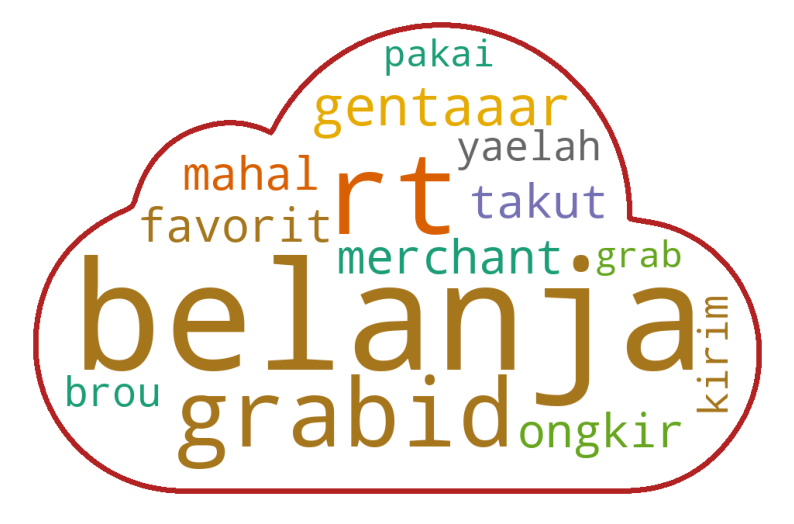

In [ ]:
# WordCloud Label 0.0 (negative)

negative = df[df.Sentiment == 0.0]
negative_string = []

for t in negative.clean_teks:
 negative_string.append(t)

negative_string = pd.Series(negative_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(negative_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()